In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

from lvmdrp.core.constants import LVM_UNAM_URL
from lvmdrp.utils.examples import fetch_example_data
from lvmdrp.core import rss, image, sky, spectrum1d
from lvmdrp.functions import skyMethod
from multiprocessing import Pool, cpu_count

In [2]:
# define input data directory
data_path = os.path.abspath(os.path.join("..", "data"))

# let's create the output directory
output_path = "./data"
os.makedirs(output_path, exist_ok=True)

fetch_example_data(url=LVM_UNAM_URL, name="sim_1d", dest_path=data_path)

# define the target simulation
SIM_NAME = "DIG_bright_linear_full_900_{}.fits"
in_path = os.path.join(data_path, SIM_NAME)
out_path = os.path.join(output_path, SIM_NAME)

[INFO]: example data already exists


In [3]:
skyMethod.createMasterSky_drp(
    in_rss=out_path.format("sci"),
    out_sky=out_path.format("msci")
)
skyMethod.createMasterSky_drp(
    in_rss=out_path.format("skyw"),
    out_sky=out_path.format("mskyw")
)
skyMethod.createMasterSky_drp(
    in_rss=out_path.format("skye"),
    out_sky=out_path.format("mskye")
)

[INFO]: preparing to create master 'sky' from './data/DIG_bright_linear_full_900_sci.fits'
[INFO]: calculating median value for each fiber
[INFO]: calculating sigma clipping with sigma = 3.0 within 1801 fibers
[INFO]: creating master (averaged) sky out of 1797
[INFO]: storing master sky in './data/DIG_bright_linear_full_900_msci.fits'
[INFO]: preparing to create master 'sky' from './data/DIG_bright_linear_full_900_skyw.fits'
[INFO]: calculating median value for each fiber
[INFO]: calculating sigma clipping with sigma = 3.0 within 59 fibers
[INFO]: creating master (averaged) sky out of 49
[INFO]: storing master sky in './data/DIG_bright_linear_full_900_mskyw.fits'
[INFO]: preparing to create master 'sky' from './data/DIG_bright_linear_full_900_skye.fits'
[INFO]: calculating median value for each fiber
[INFO]: calculating sigma clipping with sigma = 3.0 within 60 fibers
[INFO]: creating master (averaged) sky out of 59
[INFO]: storing master sky in './data/DIG_bright_linear_full_900_mskye

In [4]:
skyMethod.sepContinuumLine_drp(
    sky_ref=out_path.format("mskye"),
    out_cont_line=out_path.format("skye_cl"),
    method="skycorr",
    sky_sci=out_path.format("msci")
)

[WARNING]: Keyword name 'ESO TEL ALT' is greater than 8 characters or contains characters not allowed by the FITS standard; a HIERARCH card will be created. (VerifyWarning)
[ INFO  ] Skycorr 1.1.2
[ INFO  ] Using parameter file: /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_skye_cl.skycorr.par
[ INFO  ] Input science data file: /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_skye_cl.fits
[ INFO  ] Convert input science data file into /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_skye_cl_out_sci.fits
[ INFO  ] Read /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/sky_module/data/OBJ_DIG_bright_linear_full_900_skye_cl_out_sci.fits
[ INFO  ] Input sky data file: /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/sky_module/data/SKY_DIG_bright_linear_full_900_skye_cl.fits
[ INFO  ] Convert input sky data file into /home/mejia/Research/UNAM/l

mv: cannot stat '/home/mejia/Downloads/home/mejia/.local/bin/miniconda3/envs/lvmdrp/lib/skycorr/sysdata/solflux_monthly_average.txt.1': No such file or directory


[ INFO  ] Search for line threshold: FLUXLIM = 0.005
[ INFO  ] Sky spectrum:
[ INFO  ] Identify lines, estimate FWHM, and subtract continuum
[ INFO  ] Search for line threshold: FLUXLIM = 0.005
[ INFO  ] Derive line group weights for each pixel of the sky spectrum
[ INFO  ] Fitting ...
[ INFO  ] Input wavelength grid (no fit)
[ INFO  ] bestnorm: 1.631e+03
[ INFO  ] Chebyshev polynomial of degree 1
[ INFO  ] bestnorm: 1.633e+03
[ INFO  ] Chebyshev polynomial of degree 2
[ INFO  ] bestnorm: 1.633e+03
[ INFO  ] Chebyshev polynomial of degree 3
[ INFO  ] bestnorm: 1.633e+03
[ INFO  ] STOP -> No wavegrid correction
[ INFO  ] FIT RESULTS:
[ INFO  ] status: 3
[ INFO  ] npar: 79
[ INFO  ] npix: 6151
[ INFO  ] niter: 19
[ INFO  ] nfev: 106
[ INFO  ] fittime: 1.97 s
[ INFO  ] orignorm: 1.361e+04
[ INFO  ] bestnorm: 1.631e+03
[ INFO  ] Write fit results into output folder /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/sky_module/data/
[ INFO  ] Corrected input science data file: /home/mejia/Re

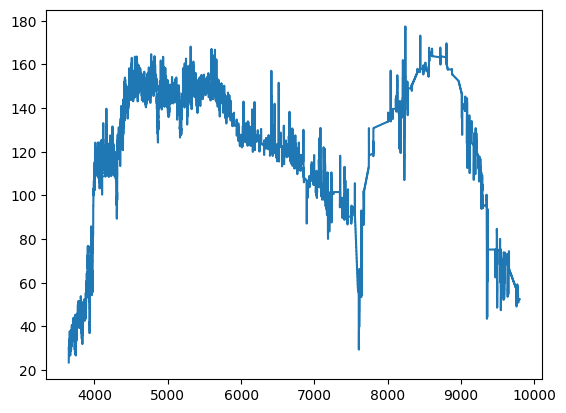

In [15]:
x = rss.RSS()
x.loadFitsData(out_path.format("skye_cl"))
plt.step(x._wave, x._data[0])